In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2              # open cv module
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [60]:
data_dir = '.\\useful_data\\datasets\\flower_photos_copy'

In [61]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir        # object

WindowsPath('useful_data/datasets/flower_photos_copy')

In [62]:
list(data_dir.glob('*/*.jpg'))[:5]  #.glob() : ek-ek krke files ko access karta h, file ka address store krta h &
                                        # obj return karta h 
# '*/*.jpg' : all jpg images from all dirs

[WindowsPath('useful_data/datasets/flower_photos_copy/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('useful_data/datasets/flower_photos_copy/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('useful_data/datasets/flower_photos_copy/daisy/105806915_a9c13e2106_n.jpg'),
 WindowsPath('useful_data/datasets/flower_photos_copy/daisy/107592979_aaa9cdfe78_m.jpg'),
 WindowsPath('useful_data/datasets/flower_photos_copy/daisy/11642632_1e7627a2cc.jpg')]

In [63]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

90


In [64]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('useful_data/datasets/flower_photos_copy/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('useful_data/datasets/flower_photos_copy/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('useful_data/datasets/flower_photos_copy/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('useful_data/datasets/flower_photos_copy/roses/12240303_80d87f77a3_n.jpg'),
 WindowsPath('useful_data/datasets/flower_photos_copy/roses/123128873_546b8b7355_n.jpg')]

In [65]:
str(roses[0])

'useful_data\\datasets\\flower_photos_copy\\roses\\102501987_3cdb8e5394_n.jpg'

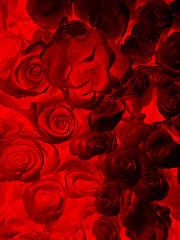

In [66]:
PIL.Image.open(str(roses[1]))

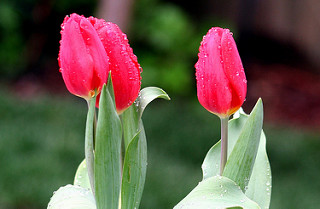

In [67]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [68]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [69]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [70]:
flowers_images_dict['roses'][:5]

[WindowsPath('useful_data/datasets/flower_photos_copy/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('useful_data/datasets/flower_photos_copy/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('useful_data/datasets/flower_photos_copy/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('useful_data/datasets/flower_photos_copy/roses/12240303_80d87f77a3_n.jpg'),
 WindowsPath('useful_data/datasets/flower_photos_copy/roses/123128873_546b8b7355_n.jpg')]

In [71]:
str(flowers_images_dict['roses'][0])

'useful_data\\datasets\\flower_photos_copy\\roses\\102501987_3cdb8e5394_n.jpg'

In [72]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))     # read the img at the location
img

array([[[10, 16, 15],
        [17, 22, 21],
        [15, 17, 17],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  1,  1]],

       [[15, 21, 20],
        [ 9, 14, 13],
        [ 4,  6,  6],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[16, 22, 21],
        [ 7, 12, 11],
        [ 0,  5,  4],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       ...,

       [[ 0,  2,  2],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  1,  1],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[ 1,  3,  3],
        [ 0,  2,  2],
        [ 0,  2,  2],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[ 3,  5,  5],
        [ 3,  5,  5],
        [ 4,  6,  6],
        ...,
        [ 0,  2,  2],
        [ 1,  3,  3],
        [ 1,  3,  3]]], dtype=uint8)

In [73]:
img.shape  # 3 for rgb channels

(240, 320, 3)

In [74]:
cv2.resize(img,(180,180)).shape
# we want to resize every img to same size

(180, 180, 3)

In [75]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [76]:
# converting to numpy arrays

X = np.array(X)
y = np.array(y)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [78]:
# preprocessing

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [90]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),  # 16: filters,  3: filter size (3,3)
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)   

Epoch 1/30


C:\Users\DELL PC\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


3/3 [==============================] - 4s 531ms/step - loss: 2.5306 - accuracy: 0.1194
Epoch 2/30
3/3 [==============================] - 2s 525ms/step - loss: 1.7446 - accuracy: 0.2388
Epoch 3/30
3/3 [==============================] - 2s 528ms/step - loss: 1.4904 - accuracy: 0.3731
Epoch 4/30
3/3 [==============================] - 2s 527ms/step - loss: 1.4700 - accuracy: 0.2388
Epoch 5/30
3/3 [==============================] - 2s 519ms/step - loss: 1.3415 - accuracy: 0.5373
Epoch 6/30
3/3 [==============================] - 2s 523ms/step - loss: 1.2068 - accuracy: 0.7015
Epoch 7/30
3/3 [==============================] - 2s 508ms/step - loss: 1.0237 - accuracy: 0.7164
Epoch 8/30
3/3 [==============================] - 2s 505ms/step - loss: 0.9099 - accuracy: 0.7015
Epoch 9/30
3/3 [==============================] - 2s 507ms/step - loss: 0.7203 - accuracy: 0.8060
Epoch 10/30
3/3 [==============================] - 2s 512ms/step - loss: 0.6830 - accuracy: 0.8209
Epoch 11/30
3/3 [=============

In [93]:
model.evaluate(X_test_scaled,y_test)  # here, overfitting problem happens

1/1 [==============================] - 0s 259ms/step - loss: 0.9620 - accuracy: 0.5652


[0.962012767791748, 0.5652173757553101]

In [81]:
da1 = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
])

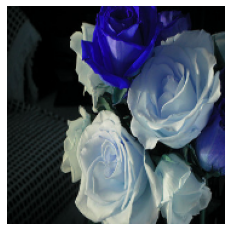

In [82]:
plt.axis('off')    # to remove axis
plt.imshow(X[0])

In [83]:
da1(X)[0]   # return transformed img (tensorflow array)

# here da1 (which is obj) is used as a function

<tf.Tensor: shape=(180, 180, 3), dtype=uint8, numpy=
array([[[13, 18, 17],
        [11, 13, 13],
        [ 3,  5,  5],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  1,  1]],

       [[13, 18, 17],
        [ 2,  5,  5],
        [ 0,  2,  2],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[14, 19, 18],
        [ 7, 12, 11],
        [ 3,  7,  6],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       ...,

       [[ 1,  2,  2],
        [ 1,  2,  2],
        [ 8, 10, 10],
        ...,
        [ 0,  0,  0],
        [ 0,  1,  1],
        [ 0,  2,  2]],

       [[ 0,  2,  2],
        [ 1,  2,  2],
        [ 9, 11, 11],
        ...,
        [ 0,  1,  1],
        [ 0,  1,  1],
        [ 0,  2,  2]],

       [[ 3,  4,  4],
        [ 4,  6,  6],
        [10, 12, 12],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 1,  3,  3]]], dtype=uint8)>

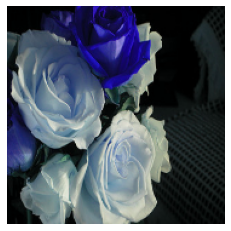

In [84]:
plt.axis('off')
plt.imshow(da1(X)[0])

In [85]:
da2 = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.5)
])

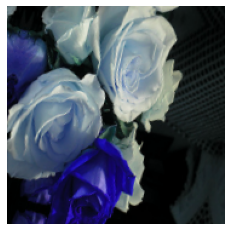

In [86]:
plt.axis('off')
plt.imshow(da2(X)[0])

In [87]:
# Improve Test Accuracy Using Data Augmentation

data_augmentation = keras.Sequential(
  [
    # we hv to add preprocessing layers
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [98]:
model2 = Sequential([
  data_augmentation,      # first layer is doing data augmentation, producing new samples
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  # layers.Dropout(0.2),
  layers.Dense(5, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
model2.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 9s 587ms/step - loss: 2.1392 - accuracy: 0.1045
Epoch 2/30
3/3 [==============================] - 3s 701ms/step - loss: 1.6473 - accuracy: 0.1940
Epoch 3/30
3/3 [==============================] - 2s 596ms/step - loss: 1.5819 - accuracy: 0.3582
Epoch 4/30
3/3 [==============================] - 2s 634ms/step - loss: 1.5470 - accuracy: 0.4925
Epoch 5/30
3/3 [==============================] - 2s 608ms/step - loss: 1.4866 - accuracy: 0.4328
Epoch 6/30
3/3 [==============================] - 3s 934ms/step - loss: 1.4201 - accuracy: 0.3582
Epoch 7/30
3/3 [==============================] - 3s 598ms/step - loss: 1.3572 - accuracy: 0.4627
Epoch 8/30
3/3 [==============================] - 2s 588ms/step - loss: 1.2489 - accuracy: 0.5224
Epoch 9/30
3/3 [==============================] - 3s 812ms/step - loss: 1.1416 - accuracy: 0.5075
Epoch 10/30
3/3 [==============================] - 2s 589ms/step - loss: 1.0877 - accuracy: 0.6269
Epoch 11/30
3/3 [==

In [100]:
model2.evaluate(X_test_scaled, y_test)  # the accuracy is improved

1/1 [==============================] - 0s 231ms/step - loss: 1.2080 - accuracy: 0.6957


[1.2080051898956299, 0.695652186870575]